# Implementação PCA e Análise Multivariada

## Preparação

### Carregamento das Bibliotecas

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

proj_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(proj_root)
from src.funcoes_pca import*

### Carregamentos dos Dados

In [3]:
df = pd.read_csv("../dados/student_habits_preprocessed.csv")


## Pré-PCA

### Variáveis Dummy

Precisamos transformar nossas variáveis categóricas, que observamos anteriormente no pré-processamento, em numéricas para que seja possível aplicar a Análise de Componente Principal.

In [4]:
#Todas as Colunas presentes no dataframe
print(df.columns)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score',
       'performance_class'],
      dtype='object')


In [5]:
#Visualização dos primeiros elementos do dataframe
print(df.head())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

Agrupamos as variáveis categóricas numa lista para aplicar a função get_dummies do pandas, que tem como objetivo criar as variáveis dummy, substituindo os valores categóricos. Também garantimos que os valores substituídos sejam numéricos ao usar dtype = int

In [6]:
#o id do estudante é desconsiderado, já que não nos entrega informações relevantes
#performance_class é nossa class label e associada diretamente com o que queremos prever. Então também não é colocada.
colunas_categoricas = [
    "gender",
    "part_time_job",
    "diet_quality",
    "parental_education_level",
    "internet_quality",
    "extracurricular_participation"
]


In [7]:
df_dummy = pd.get_dummies(df[colunas_categoricas], drop_first= True, dtype = int) 
#drop_first evita multicolinearidade ao omitir uma variável dummy associada. Podemos inferir a variável dummy omitida.
print(df_dummy.head())

   gender_Male  gender_Other  part_time_job_Yes  diet_quality_Good  \
0            0             0                  0                  0   
1            0             0                  0                  1   
2            1             0                  0                  0   
3            0             0                  0                  0   
4            0             0                  0                  0   

   diet_quality_Poor  parental_education_level_High School  \
0                  0                                     0   
1                  0                                     1   
2                  1                                     1   
3                  1                                     0   
4                  0                                     0   

   parental_education_level_Master  internet_quality_Good  \
0                                1                      0   
1                                0                      0   
2                      

Com os valores substituídos por 0s e 1s em variáveis mais específicas, juntamos os valores numéricos e categóricos novamente ao dataframe.

In [8]:
#exam_score representa o desempenho do aluno e é o que queremos prever. Portanto, não mantemos sua coluna no dataframe
colunas_numericas = [
    "age",
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "attendance_percentage",
    "sleep_hours",
    "exercise_frequency",
    "mental_health_rating",
]

In [9]:
#juntamos novamente as colunas no dataframe. Agora, com apenas preditores numéricos
df_final = pd.concat([df[colunas_numericas], df_dummy], axis = 1) # axis = 1 para agrupar por coluna
print(df_final.head())

   age  study_hours_per_day  social_media_hours  netflix_hours  \
0   23                  0.0                 1.2            1.1   
1   20                  6.9                 2.8            2.3   
2   21                  1.4                 3.1            1.3   
3   23                  1.0                 3.9            1.0   
4   19                  5.0                 4.4            0.5   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                   85.0          8.0                   6   
1                   97.3          4.6                   6   
2                   94.8          8.0                   1   
3                   71.0          9.2                   4   
4                   90.9          4.9                   3   

   mental_health_rating  gender_Male  gender_Other  part_time_job_Yes  \
0                     8            0             0                  0   
1                     8            0             0                  0   
2                

### Centering e Scaling

In [10]:
print('Médias:\n', df_final.mean())

Médias:
 age                                     20.4980
study_hours_per_day                      3.5501
social_media_hours                       2.5055
netflix_hours                            1.8197
attendance_percentage                   84.1317
sleep_hours                              6.4701
exercise_frequency                       3.0420
mental_health_rating                     5.4380
gender_Male                              0.4770
gender_Other                             0.0420
part_time_job_Yes                        0.2150
diet_quality_Good                        0.3780
diet_quality_Poor                        0.1850
parental_education_level_High School     0.4830
parental_education_level_Master          0.1670
internet_quality_Good                    0.4470
internet_quality_Poor                    0.1620
extracurricular_participation_Yes        0.3180
dtype: float64


In [11]:
print(f'Desvio padrão: \n {df_final.std()}')

Desvio padrão: 
 age                                     2.308100
study_hours_per_day                     1.468890
social_media_hours                      1.172422
netflix_hours                           1.075118
attendance_percentage                   9.399246
sleep_hours                             1.226377
exercise_frequency                      2.025423
mental_health_rating                    2.847501
gender_Male                             0.499721
gender_Other                            0.200690
part_time_job_Yes                       0.411028
diet_quality_Good                       0.485130
diet_quality_Poor                       0.388492
parental_education_level_High School    0.499961
parental_education_level_Master         0.373162
internet_quality_Good                   0.497432
internet_quality_Poor                   0.368635
extracurricular_participation_Yes       0.465932
dtype: float64


In [12]:
#centralização dos dados
df_central = df_final - df_final.mean()
#escalonamento
df_escal = df_central/df_final.std()
print(df_escal.head())

        age  study_hours_per_day  social_media_hours  netflix_hours  \
0  1.084009            -2.416859           -1.113507      -0.669415   
1 -0.215762             2.280566            0.251189       0.446742   
2  0.217495            -1.463758            0.507070      -0.483389   
3  1.084009            -1.736073            1.189418      -0.762428   
4 -0.649019             0.987072            1.615885      -1.227494   

   attendance_percentage  sleep_hours  exercise_frequency  \
0               0.092380     1.247496            1.460436   
1               1.400995    -1.524898            1.460436   
2               1.135017     1.247496           -1.008184   
3              -1.397101     2.225988            0.472988   
4               0.720090    -1.280275           -0.020736   

   mental_health_rating  gender_Male  gender_Other  part_time_job_Yes  \
0              0.899736    -0.954533     -0.209279          -0.523079   
1              0.899736    -0.954533     -0.209279          

## Matriz de Covariância e Autovetores/Autovalores

### Cálculo da Matriz de Covariância

In [13]:
mcov = np.cov(df_escal, rowvar = False) # aqui a escolha de usar numpy no lugar de df.cov() é para facilitar as operações com a matriz cov para calcular os autovetores/valores
print(mcov) # a saída é um n-dimensional array e não um dataframe

[[ 1.00000000e+00  3.97117909e-03 -9.15119924e-03 -1.17410395e-03
  -2.60552015e-02  3.74819156e-02 -3.83623585e-03 -4.51013606e-02
   2.55621263e-02  1.53085438e-02 -1.16803617e-02 -2.00606263e-03
  -1.01922211e-02 -2.73541330e-02 -4.84173769e-03  2.99867285e-02
   2.50871823e-02 -4.99281817e-03]
 [ 3.97117909e-03  1.00000000e+00  2.02823140e-02 -3.11583466e-02
   2.62641177e-02 -2.77571140e-02 -2.87011920e-02 -3.76782631e-03
  -2.56343720e-02  8.81438124e-03 -2.91328371e-02 -3.56487497e-03
  -6.67773374e-02  1.47231683e-02  9.00917021e-03  1.51423000e-03
  -2.64652647e-02 -3.26420577e-03]
 [-9.15119924e-03  2.02823140e-02  1.00000000e+00  1.14765638e-02
   4.04787925e-02  1.82362596e-02 -3.73190028e-02  1.49649069e-03
  -4.99489320e-03  1.56089415e-02  2.12238286e-02  2.60837217e-02
   1.13895820e-02  2.92761388e-02  7.50800952e-03  4.60705712e-02
  -1.04015169e-02 -1.85973321e-02]
 [-1.17410395e-03 -3.11583466e-02  1.14765638e-02  1.00000000e+00
  -2.09153973e-03 -9.34549060e-04 -6.

### Cálculos dos Autovetores e Autovalores

In [14]:
autovalores,autovetores = np.linalg.eig(mcov)
#Ordenamento dos autovalores - encontrar o autovalor de maior variância e seu autovetor associado (loadings do PC1)
idx = autovalores.argsort()[::-1] # argsort do numpy retorna os indíces que ordenam os valores crescentemente. [::-1] inverte a ordem, retornando os índices descrescentes.
autovalores = autovalores[idx]
autovetores[:, idx]

array([[-4.49508887e-02, -2.01163087e-02,  3.17402474e-02,
         1.44345860e-03, -8.49801491e-02,  5.87150499e-01,
         2.71557319e-01, -2.96912500e-01, -9.41829899e-02,
        -1.28514909e-01,  5.25458291e-01, -8.97190747e-02,
         1.08904816e-01, -3.68607495e-01, -1.19704368e-01,
         5.03521654e-02, -5.99671000e-02,  7.04468665e-02],
       [-3.64085494e-02,  9.04067008e-02, -8.26620424e-03,
        -1.86555792e-01,  5.16216851e-01,  5.63035439e-02,
        -1.45848735e-01, -1.84016288e-01,  7.77287198e-02,
         4.34867952e-02,  2.59157288e-01,  6.46165735e-01,
        -3.39313670e-01,  7.59912971e-02, -1.93430872e-02,
         7.17483083e-02,  8.78133771e-02, -6.38651544e-02],
       [-3.65818469e-02,  7.24581009e-02, -1.03592712e-01,
        -5.59526570e-02,  2.17634092e-01, -1.74200174e-01,
         5.99133465e-01,  2.04746310e-01,  3.43710068e-01,
        -5.75569684e-02,  1.79595930e-02,  2.54488454e-01,
         5.37778219e-01,  2.62102117e-02, -9.93572552e

In [15]:
print(autovalores[0], autovalores[1])

1.5228641781927181 1.4471168703582755


In [16]:
print(autovetores[:,0], autovetores[:,1])

[-0.04495089 -0.03640855 -0.03658185 -0.04198148  0.15220668 -0.0172684
  0.12301827  0.13712642  0.09630866 -0.01711799 -0.00079708 -0.0778435
  0.1044041   0.46790756 -0.49594861 -0.48329859  0.45535744  0.0615765 ] [-0.02011631  0.0904067   0.0724581   0.03127251 -0.07655615 -0.10065403
 -0.00160501  0.07610918 -0.0056806   0.02079608  0.13273867  0.52512872
 -0.53048861  0.36138756 -0.35060779  0.2486893  -0.24808251 -0.10595201]


## Plotagem PC1 x PC2

### Cálculo dos componentes principais

In [17]:
df_pca = np.dot(df_escal, autovetores)

df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range (autovetores.shape[1])])

In [18]:
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.908139 -2.034655  0.908973  1.836901 -1.192233 -0.623170 -0.754344   
1  1.101848  1.701065  0.057270  0.483933 -0.431629  1.001927 -0.996758   
2  2.376423 -2.230837 -0.334529 -0.126791  1.015520  0.918557  0.682046   
3 -2.418289 -2.844686 -0.937106  0.627344  0.610631  0.567075 -0.970608   
4 -2.514449 -0.762743  0.045694  0.696722  0.174423 -0.520027 -0.300291   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.563730 -1.176046 -2.253656  1.182669 -0.885202  0.171888 -1.324837   
1 -0.723813 -1.181905  1.864802 -0.472230 -0.940184 -0.218514  1.681986   
2  0.576590  1.145470  0.500017  0.896468  2.041818  0.366975 -1.536990   
3  0.229732  0.638387 -1.715209  1.884401  0.833992  1.602834 -0.257669   
4 -0.411475 -0.295704  2.742336 -0.250792  0.312976  1.323705  0.602733   

       PC15      PC16      PC17      PC18  
0 -0.060254  0.690264  1.094502  0.603905  
1  0.58057

### Pegando só PC1 e PC2 para a plotagem

In [19]:
Z = df_escal @ autovetores[:,:2]
print(Z)
Z_manual = Z = np.array(Z)

            0         1
0   -0.908139 -2.034655
1    1.101848  1.701065
2    2.376423 -2.230837
3   -2.418289 -2.844686
4   -2.514449 -0.762743
..        ...       ...
995 -0.099743  0.332328
996  1.257134 -1.117746
997 -0.951374  1.117841
998 -0.217262 -0.324944
999 -0.143700  0.683799

[1000 rows x 2 columns]


In [20]:
print(autovalores.sum())
print(f'{100*autovalores[0]/autovalores.sum()} %')

17.99999999999999
8.460356545515106 %


In [21]:
print(autovalores)

[1.52286418 1.44711687 1.38500962 1.16876443 1.10329462 1.0743156
 1.04384198 1.01507065 1.00434945 0.98978569 0.97027055 0.94828558
 0.93056729 0.88923039 0.78274332 0.61278002 0.57651146 0.53519831]


In [22]:
desempenho = df['performance_class']
print(desempenho)

0      Recuperação
1        Excelente
2        Reprovado
3        Reprovado
4      Recuperação
          ...     
995            Bom
996    Recuperação
997    Recuperação
998    Recuperação
999            Bom
Name: performance_class, Length: 1000, dtype: object


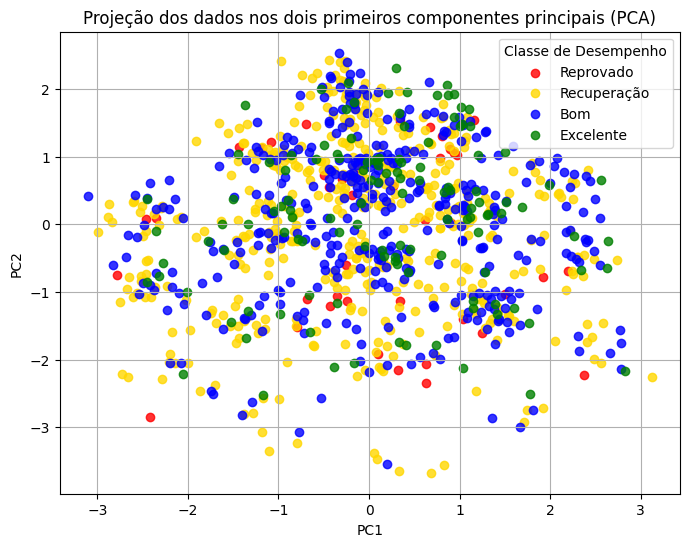

In [23]:
cores = {
    'Reprovado' : 'red',
    'Recuperação' : 'gold',
    'Bom' : 'blue',
    'Excelente' : 'green'
}
plt.figure(figsize=(8, 6))

for label in ["Reprovado", "Recuperação", "Bom", "Excelente"]:
    desemp = desempenho == label
    plt.scatter(Z[desemp, 0], Z[desemp, 1], label=label, alpha=0.8, c=cores[label])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projeção dos dados nos dois primeiros componentes principais (PCA)')
plt.legend(title="Classe de Desempenho")
plt.grid(True)
plt.savefig("resultados/figuras_pca/projecao_dados.png")


### Scree Plot

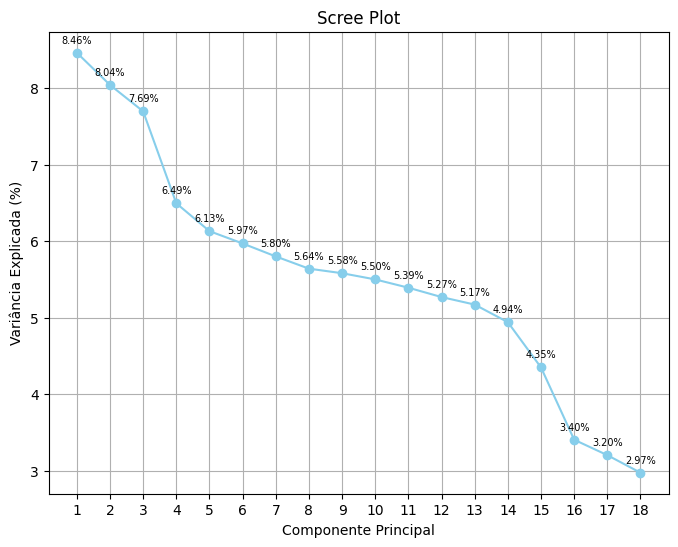

In [24]:
n_componentes_array = np.arange(len(autovalores))+1
variancia_exp = 100* (autovalores/autovalores.sum())

plt.figure(figsize=(8, 6))
plt.plot(n_componentes_array, variancia_exp, '-o', color = 'skyblue')
for i, val in enumerate(variancia_exp):
    plt.text(n_componentes_array[i], val+0.1, f'{val:.2f}%', 
             ha='center', va='bottom', fontsize=7, color='black'
    )


plt.title("Scree Plot")
plt.grid()
plt.xticks(n_componentes_array)
plt.xlabel("Componente Principal")
plt.ylabel("Variância Explicada (%)")
plt.savefig("resultados/figuras_pca/scree_plot.png")

### Biplot

NameError: name 'mpl_axes_aligner' is not defined

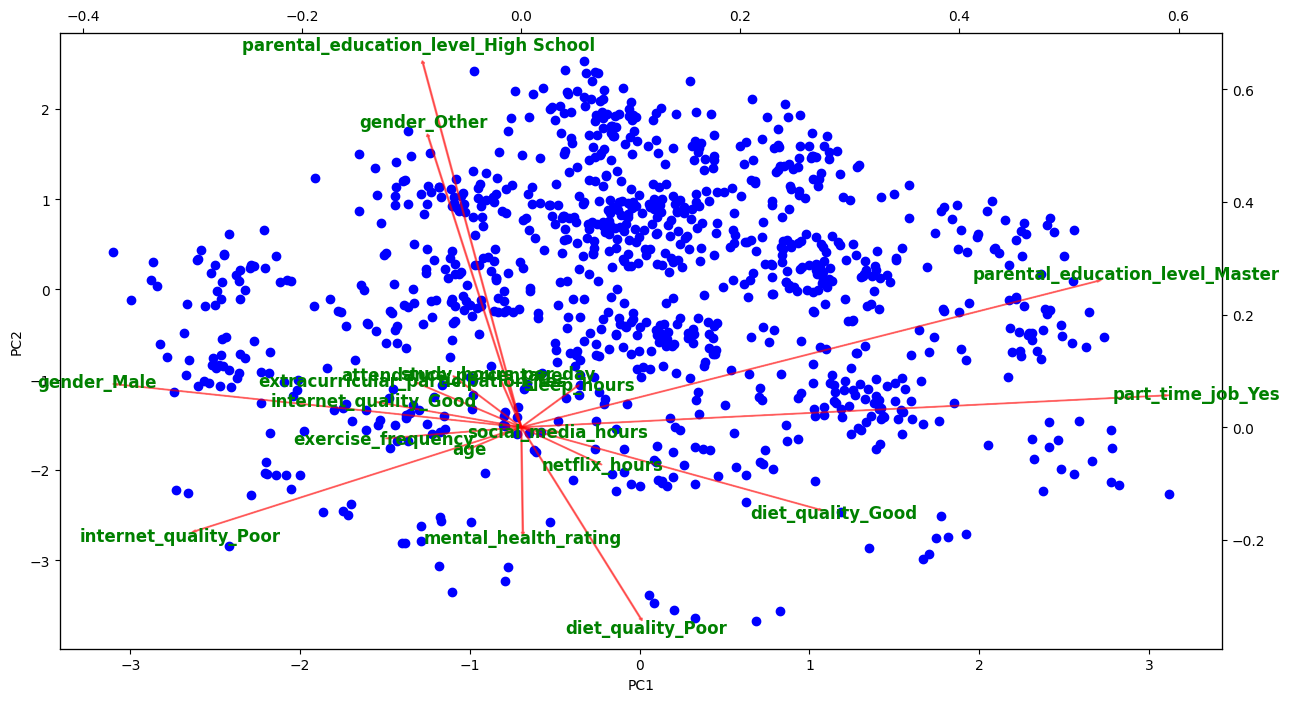

In [27]:
df_loads = pd.DataFrame(
    autovetores[:2, :],          # apenas PC1 e PC2
    index=['PC1', 'PC2'],        # nomeia as linhas
    columns=df_final.columns     # nomeia as colunas pelas variáveis originais
)
biplot(df_pca, df_loads)

          0         1         2   ...        15        16        17
0  -0.044951 -0.020116  0.031740  ... -0.128515 -0.296912 -0.094183
1  -0.036409  0.090407 -0.008266  ...  0.043487 -0.184016  0.077729
2  -0.036582  0.072458 -0.103593  ... -0.057557  0.204746  0.343710
3  -0.041981  0.031273 -0.133664  ... -0.706569  0.242183 -0.332802
4   0.152207 -0.076556 -0.139172  ... -0.013162  0.412584 -0.034747
5  -0.017268 -0.100654 -0.116993  ...  0.294200  0.279414  0.352002
6   0.123018 -0.001605  0.089648  ...  0.312562  0.455454 -0.178614
7   0.137126  0.076109  0.031432  ...  0.113897  0.259665  0.180759
8   0.096309 -0.005681  0.367736  ... -0.093417  0.018295  0.103473
9  -0.017118  0.020796 -0.365061  ...  0.054848 -0.022613 -0.200018
10 -0.000797  0.132739  0.009885  ...  0.278718 -0.429218  0.046669
11 -0.077843  0.525129  0.354315  ... -0.071490  0.165936  0.085074
12  0.104404 -0.530489 -0.356556  ...  0.025080 -0.041079  0.055743
13  0.467908  0.361388 -0.318220  ... -0.020938 